# Sentiment Analysis on Tweets

In [ ]:
# Import necessary libraries

!pip install snscrape
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import snscrape.modules.twitter as sntwitter

import nltk
nltk.download('all') #run once and comment it out to avoid it downloading multiple times
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import re
from textblob import TextBlob

import warnings
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
# Set up query for Twitter data retrieval
query="(commercialsurrogacyinindia OR #commercialsurrogacyinindia OR commercial surrogacy india OR #commercialsurrogacy)"

# Scrape Twitter data using snscrape
tweets = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
  if i>1000:
    break
  else:
    tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location,\
                   tweet.content, tweet.likeCount, tweet.retweetCount])

# Create a DataFrame from the scraped Twitter data
df=pd.DataFrame(tweets, columns = ['Date', 'ID', 'url', 'username', 'source', 'location', "tweet","num of likes",'num of retweet'])


# Save DataFrame to a CSV file
df.to_csv('sentiment.csv', mode ='a')

<ipython-input-9-0211a97c66bc>:13: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet.content, tweet.likeCount, tweet.retweetCount])


In [ ]:
# Read the CSV file into a DataFrame
df=pd.read_csv('/content/sentiment.csv',encoding='unicode_escape')
df.head(2)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num of likes,num of retweet
0,0,2023-04-05 12:45:00+00:00,1643595591925252101,https://twitter.com/ThePrintIndia/status/16435...,ThePrintIndia,TweetDeck,"New Delhi, India","In an affidavit before SC, govt says several p...",4,2
1,1,2023-03-27 15:28:26+00:00,1640375230207078400,https://twitter.com/Vedic_Legal/status/1640375...,Vedic_Legal,Twitter Web App,NaN,Laws related to surrogacy: India has laws that...,1,0


In [ ]:
# Initialize a Porter Stemmer and WordNet Lemmatizer
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [ ]:
# Initialize an empty list for the preprocessed tweets
corpus=[]

# Preprocess each tweet in the DataFrame
for i in range(0,len(df)):
  review=re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)',' ',df['tweet'][i])
  review=review.lower()
  review=review.split()
  review=[wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
# Define a function to calculate polarity using TextBlob
def polarity(tweet):
  return TextBlob(tweet).sentiment.polarity

#Function to get sentiment type #setting the conditions
def sentimenttextblob(polarity):
  if polarity < 0:
    return "Negative"
  elif polarity == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
# Add processed tweets, polarity, and sentiment columns to the DataFrame
df['processed_tweets']=corpus
df['Polarity'] = df['processed_tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)

# Display the count of each sentiment type
sent=df['Sentiment'].value_counts()
sent

Positive    429
Neutral     400
Negative    172
Name: Sentiment, dtype: int64

In [ ]:
# Display the DataFrame with processed tweets, polarity, and sentiment
df

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num of likes,num of retweet,processed_tweets,Polarity,Sentiment
0,0,2023-04-05 12:45:00+00:00,1643595591925252101,https://twitter.com/ThePrintIndia/status/16435...,ThePrintIndia,TweetDeck,"New Delhi, India","In an affidavit before SC, govt says several p...",4,2,affidavit sc govt say several provision like b...,0.133333,Positive
1,1,2023-03-27 15:28:26+00:00,1640375230207078400,https://twitter.com/Vedic_Legal/status/1640375...,Vedic_Legal,Twitter Web App,NaN,Laws related to surrogacy: India has laws that...,1,0,law related surrogacy india law permit commerc...,0.000000,Neutral
2,2,2023-03-04 16:53:12+00:00,1632061644045160448,https://twitter.com/kunaldebnath/status/163206...,kunaldebnath,Twitter for iPhone,India,"The Surrogacy (Regulation) Act, 2021: Analyzin...",0,0,surrogacy (regulation act 2021 analyzing effec...,0.000000,Neutral
3,3,2023-02-19 21:10:08+00:00,1627415258737385474,https://twitter.com/AOlamina47/status/16274152...,AOlamina47,Twitter for iPhone,Anywhere.,@onosowobo Indiaâs government seeks to ban c...,0,0,indiaâs government seek ban commercial surro...,-0.200000,Negative
4,4,2023-02-19 06:46:21+00:00,1627197880657387521,https://twitter.com/Amethystinia/status/162719...,Amethystinia,Twitter for Android,Sri Lanka,"@n2k1p1 Commercial surrogacy, like every indus...",3,0,commercial surrogacy like every industry relia...,0.012500,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,2017-04-20 17:41:21+00:00,855114175672078336,https://twitter.com/ScienceSamosa/status/85511...,ScienceSamosa,Twitter Web Client,"Bengaluru, India",After Thailand and India restricted commercial...,0,0,thailand india restricted commercial surrogacy...,0.000000,Neutral
997,997,2017-04-19 14:13:15+00:00,854699416149774341,https://twitter.com/JessicaMinhas/status/85469...,JessicaMinhas,Twitter for iPhone,"New York, NY",Commercial surrogacy in India- India's propose...,0,0,commercial surrogacy india india's proposed su...,0.000000,Neutral
998,998,2017-04-17 20:01:24+00:00,854062256136609792,https://twitter.com/SayNo2BigGay/status/854062...,SayNo2BigGay,SocialOomph,"NJ, USA, Earth","Nations famous for ""fertility tourism""âinclu...",0,0,"nation famous ""fertility tourism""âincluding ...",0.166667,Positive
999,999,2017-04-12 17:10:12+00:00,852207234989871106,https://twitter.com/SHIjournal/status/85220723...,SHIjournal,Hootsuite,NaN,Book review by Sreeparna Chattopadhyay: 'Trans...,0,1,book review sreeparna chattopadhyay 'transnati...,0.000000,Neutral


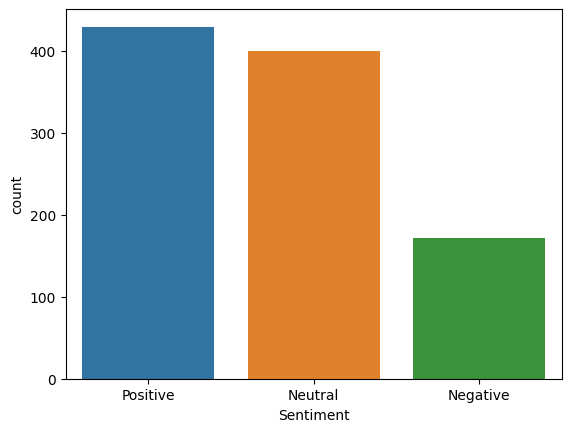

In [ ]:
# Plot a count plot for the sentiments
sns.countplot(x="Sentiment", data=df)
plt.show()